# IPL Data Analysis

The Indian Premier League (IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India.The league was founded by the Board of Control for Cricket in India (BCCI) in 2008. The IPL has an exclusive window in ICC Future Tours Programme.

In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [172]:
# Reading Data using Pandas
df= pd.read_csv('matches.csv')

In [173]:
# Displyind first 5 rows of dataset
df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [174]:
# Checking shape od dataset
df.shape

(756, 18)

In [175]:
# Checking type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [176]:
# The .describe method gives us the statistical overview of numerical columns
df.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,0.025132,13.283069,3.350529
std,3464.478148,0.156630,23.471144,3.387963
min,1.000000,0.000000,0.000000,0.000000
25%,189.750000,0.000000,0.000000,0.000000
50%,378.500000,0.000000,0.000000,4.000000
75%,567.250000,0.000000,19.000000,6.000000
max,11415.000000,1.000000,146.000000,10.000000


## Data Cleaning and Processing

We wont be using the Umpires Columns ('umpire1', 'umpire2', 'umpire3') in this analysis so we will remove those fields using .drop() method

In [177]:
df.drop(['umpire1', 'umpire2', 'umpire3'], axis=1, inplace= True)

In [178]:
df.head(2)

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium


In [179]:
# Exploring all column names in the data frame
df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [180]:
df.result.value_counts()

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [181]:
df.Season.unique()

array(['IPL-2017', 'IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011',
       'IPL-2012', 'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [182]:
df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [183]:
df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

### From the Above Observations some Data cleaning is required
1. Pune was represented by various Team Names as 'Rising Pune Supergiant' & 'Pune Warriors', so for a convinience we will changes these with the recent team representing Pune 'Rising Pune Supergiant' in all columns involving this name i.e 'team1','team2','winner' & 'toss_winner' columns.
2. Similarly 2nd Change is in team name of Delhi. Earlier the team name for delhi was 'Delhi Daredevils' but later it was changed to 'Delhi Capitals' so we will replace the "delhi Daredevils' with 'Delhi Capitals'


In [184]:
# We will use the .replace() method for the above mentioned cleaning
df.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
df.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
df.toss_winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)
df.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals','Pune Warriors' : 'Rising Pune Supergiant'},inplace=True)

In [185]:
df.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

### Checking for missing values

In [186]:
df.isnull().sum()

id                 0
Season             0
city               7
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
dtype: int64

In [187]:
df.isnull().sum()/len(df)

id                 0.000000
Season             0.000000
city               0.009259
date               0.000000
team1              0.000000
team2              0.000000
toss_winner        0.000000
toss_decision      0.000000
result             0.000000
dl_applied         0.000000
winner             0.005291
win_by_runs        0.000000
win_by_wickets     0.000000
player_of_match    0.005291
venue              0.000000
dtype: float64

As percentage of missing value is very less, it will be better to drop missing values

In [188]:
df= df.dropna()

In [189]:
df.isnull().sum()

id                 0
Season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
dtype: int64

## Exploratory Analysis and Visualization

## Asking Interesting Questions on data

1. Find the total number of matches played in each city.

2. Find the total matches won by each team.

3. Which season had most number of matches played? 

4. What was the most preferred decision on winning toss i.e. choose to bat / choose to field?

5. Which decision has proved most beneficial i.e Field / Bat?

6. Which venue has hosted the most number of IPL matches?

7. Who has been awarded with Player Of the Match maximum number of times?

8. Who has won the IPL trophy most number of times?


### 1. Find the total number of matches played in each city

In [190]:
df.rename(columns={'id':'matches'},inplace=True)


In [191]:
df.head(2)

,matches,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium


In [192]:
df_city= pd.DataFrame(df.groupby('city')['matches'].count())

In [193]:
df2=df_city.sort_values('matches', ascending= False)

<AxesSubplot:title={'center':'Top cities with higheest no. of matches'}, xlabel='city'>

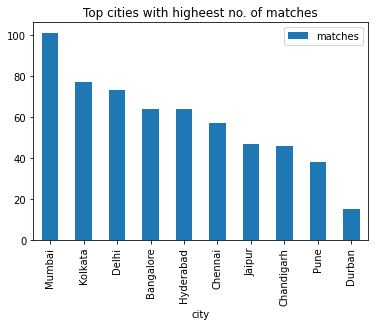

In [194]:
df_city.sort_values('matches', ascending= False).head(10).plot(kind='bar', title='Top cities with higheest no. of matches')

Mumbai, Kolkata and Delhi are top three cities where most of the matcheds were played.

Text(0.5, 1.0, 'Number Of Matches Played In Each City')

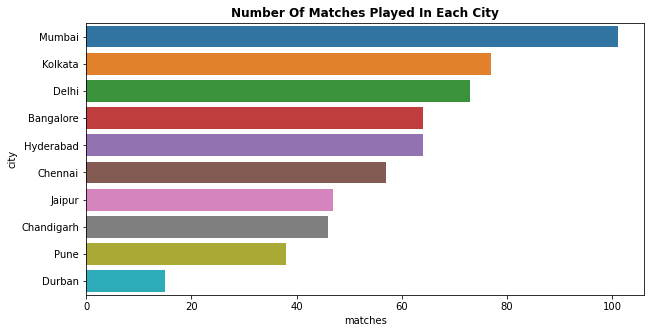

In [195]:
df3=df2.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='matches', y= df3.index, data=df3)
plt.title('Number Of Matches Played In Each City', fontweight='bold')

### 2 . Find the total matches won by each team.

In [196]:
df_winner= pd.DataFrame(df.groupby('winner')['matches'].count())

In [197]:
df_winner=df_winner.sort_values('matches', ascending= False)

In [198]:
# df_winner.sort_values('matches', ascending= False).plot(kind='bar', title= 'No. of matches won by each team')

Text(0.5, 1.0, 'Matches Won By Each Team')

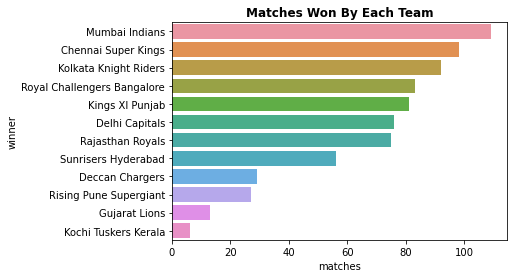

In [199]:
sns.barplot(x='matches', y=df_winner.index, data=df_winner )
plt.title('Matches Won By Each Team',fontweight='bold')

Mumbai Indian, Chennai Super Kings and Kolkata Knight Riders are top 3 winners in IPL

### 3. Which season had most number of matches played?

In [200]:
df_season= pd.DataFrame(df.groupby('Season')['matches'].count())

In [201]:
df_season= df_season.sort_values('matches', ascending = False)
df_season

,matches
Season,
IPL-2013,76
IPL-2012,74
IPL-2011,72
IPL-2010,60
IPL-2016,60
IPL-2018,60
IPL-2017,59
IPL-2019,59
IPL-2008,58


Text(0.5, 1.0, 'Mathes Played In Each Season')

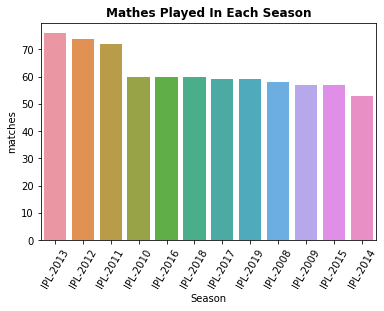

In [202]:
sns.barplot(x= df_season.index, y='matches', data=df_season )
plt.xticks(rotation='60')
plt.title("Mathes Played In Each Season",fontweight='bold')

### 4. What was the most preferred decision on winning toss i.e. choose to bat / choose to field?

In [203]:
df.toss_decision.unique()

array(['field', 'bat'], dtype=object)

In [204]:
df_decision= pd.DataFrame(df.groupby('toss_decision')['matches'].count())
df_decision

,matches
toss_decision,
bat,289
field,456


Text(0, 0.5, 'Total')

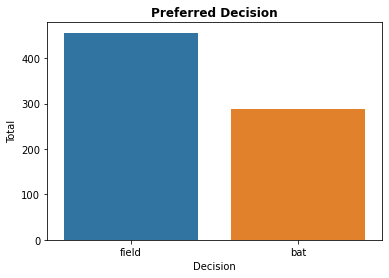

In [205]:
sns.countplot('toss_decision', data=df)
plt.title("Preferred Decision",fontweight='bold')
plt.xlabel('Decision')
plt.ylabel('Total')

This observation tells us. Almost 60% of the times the toss winner Chooses to Field First.

### 5. Which decision has proved most beneficial i.e Field / Bat?

In [206]:
# we will create 2 separate Data Frames one for Bat and other field then will merge it into one single data frame.

In [208]:
field_df = df.loc[(df['toss_winner'] == df['winner']) & (df['toss_decision'] == 'field'), ['matches', 'winner','toss_decision']]

In [209]:
field_df.head()

,matches,winner,toss_decision
1,2,Rising Pune Supergiant,field
2,3,Kolkata Knight Riders,field
3,4,Kings XI Punjab,field
5,6,Sunrisers Hyderabad,field
6,7,Mumbai Indians,field


In [210]:
field_df.winner.count()

257

In [211]:
bat_df=df.loc[(df['toss_winner'] == df['winner']) & (df['toss_decision'] == 'bat'), ['matches', 'winner','toss_decision']]

In [212]:
bat_df.head()

,matches,winner,toss_decision
4,5,Royal Challengers Bangalore,bat
14,15,Delhi Capitals,bat
20,21,Sunrisers Hyderabad,bat
50,51,Delhi Capitals,bat
54,55,Royal Challengers Bangalore,bat


In [213]:
bat_df.winner.count()

133

In [214]:
frames = [bat_df, field_df]
result_df = pd.concat(frames)
result_df = result_df.groupby('toss_decision')[['matches']].count()
result_df

,matches
toss_decision,
bat,133
field,257


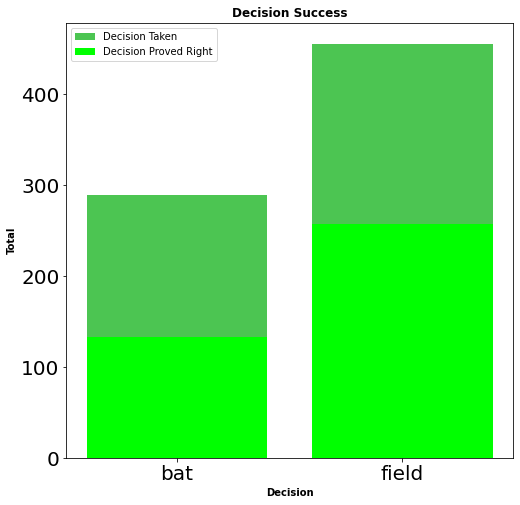

In [215]:
plt.figure(figsize=(8,8))
plt.title("Decision Success",fontweight='bold')
plt.xlabel('Decision',fontweight='bold')
plt.ylabel('Total',fontweight='bold')
plt.tick_params(labelsize=20)
plt.bar(df_decision.index, df_decision.matches, color=['#4CC552','#4CC552']);
plt.bar(result_df.index, result_df.matches, color=['#00FF00','#00FF00']);
plt.legend(['Decision Taken','Decision Proved Right']);

### 6. Which venue has hosted the most number of IPL matches?

In [217]:
venue_df = df.groupby('venue')[['matches']].count()
venue_df = venue_df.sort_values('matches',ascending=False).reset_index()
venue_df.rename(columns={'matches':'Total','venue':'Stadium'},inplace=True)
venue_df

,Stadium,Total
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,71
3,Feroz Shah Kotla,66
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


In [218]:
venue_top= venue_df.head(10)
venue_top

,Stadium,Total
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,71
3,Feroz Shah Kotla,66
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Subrata Roy Sahara Stadium,17


Text(0.5, 1.0, 'Top 10 venue hosted most of the matches')

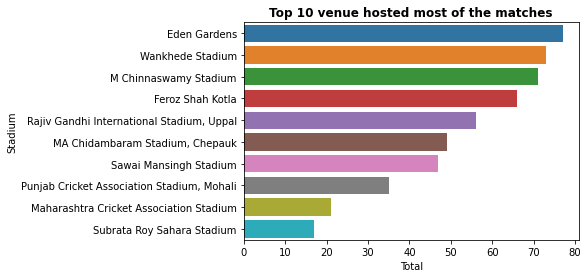

In [219]:
sns.barplot(y='Stadium', x= 'Total', data= venue_top)
plt.title("Top 10 venue hosted most of the matches",fontweight='bold')

Eaden Garden has hosted the most number of IPL matches

### 7. Who has been awarded with Player Of the Match maximum number of times?

In [220]:
player_match= df.groupby('player_of_match')[['matches']].count()

In [221]:
player_match= player_match.sort_values('matches', ascending= False).reset_index()
player_match_df=player_match.head(10)

<AxesSubplot:xlabel='matches', ylabel='player_of_match'>

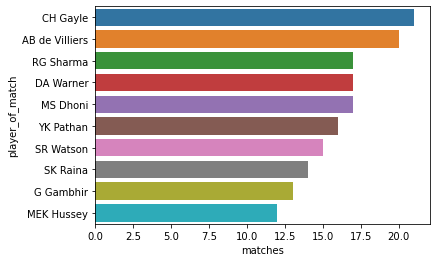

In [222]:
sns.barplot(x='matches', y= 'player_of_match', data=player_match_df)

CH Gayle has been awarded with player of the match maximum number of times

### 8. Who has won the IPL trophy most number of times?

In [223]:
final_df = df.groupby('Season').tail(1)
final_df = final_df.sort_values('Season') 
final_df

,matches,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
116,117,IPL-2008,Mumbai,01-06-2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy
173,174,IPL-2009,Johannesburg,24-05-2009,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium
233,234,IPL-2010,Mumbai,25-04-2010,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy
306,307,IPL-2011,Chennai,28-05-2011,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk"
380,381,IPL-2012,Chennai,27-05-2012,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk"
456,457,IPL-2013,Kolkata,26-05-2013,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens
516,517,IPL-2014,Bangalore,01-06-2014,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium
575,576,IPL-2015,Kolkata,24-05-2015,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens
635,636,IPL-2016,Bangalore,29-05-2016,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium
58,59,IPL-2017,Hyderabad,21-05-2017,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal"


In [224]:
final_df.winner.unique()

array(['Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kolkata Knight Riders', 'Mumbai Indians', 'Sunrisers Hyderabad'],
      dtype=object)

In [225]:
final_df.winner.value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Sunrisers Hyderabad      1
Rajasthan Royals         1
Deccan Chargers          1
Name: winner, dtype: int64

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Rajasthan Royals'),
  Text(1, 0, 'Deccan Chargers'),
  Text(2, 0, 'Chennai Super Kings'),
  Text(3, 0, 'Kolkata Knight Riders'),
  Text(4, 0, 'Mumbai Indians'),
  Text(5, 0, 'Sunrisers Hyderabad')])

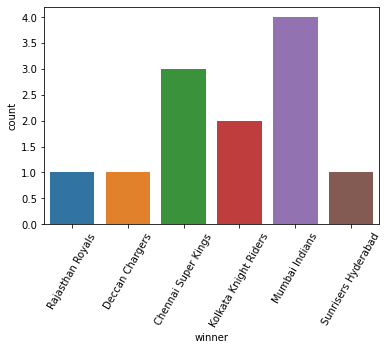

In [226]:
sns.countplot(x=final_df['winner'])
plt.xticks(rotation='60')

We can see MI has won the most Seasons followed by CSK and KKR

## Inferences and Conclusion

In this analysis I used the matches.csv file from the kaggle Datasets. Following are my conclusions about it

1. A total of 756 matches have been played from 2008 - 2019
2. Out of these 756 matches 743 matches were played normally and had a normal result
3. Most number of Matches were played in Mumbai [101]
4. Mumbai Indian's Have Won the Most Number of Matches (109) followed by Chennai Super Kings with 100 Matches
5. IPL-2013 Season Hosted most Number of Matches (76)
6. Eden Gardens (Stadium) Hosted the Most Number of Matches (77) followed by wankhede Stadium (73)
7. Chris Gayle has been the Man Of The Match Most Number of Times with "21" Awards followed by AB di Villiers (20) and MS Dhoni (17)
8. Mumbai Indians Have been the IPL Champions Most number of times (4) followed by Chennai Super Kings (3)
9. Mumbai Indians and Chennai Super Kings have been the dominant Teams